# Locally Weighted Linear Regression (LWLR)

LRLR is a non-parametric technique that performs a local linear regression
every time a prediction is requested for a specific input $\mathbf{x}$.

Let's generate some synthetic data as a noisy sinusoid:

(200, 2)


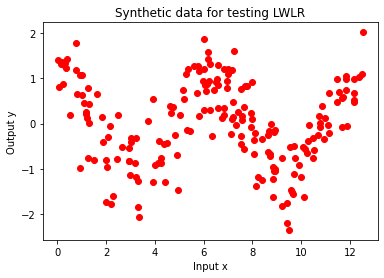

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data

# Generate 100 points x between 0 and 4pi

m = 200
X = np.random.uniform(0, 4*np.pi, m).reshape((m, 1))
X = np.concatenate((np.ones((m, 1)), X), 1)

print(X.shape)
# Target is a noisy sinusoid in x

y = (np.cos(X[:,1:2]) + np.random.normal(0, 0.5, (m, 1))).reshape((m, 1))

# Plot them

plt.plot(X[:,1], y, 'ro')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data for testing LWLR')
plt.show()

In [2]:
# Split training set into train and validation partitions

m = X.shape[0]
order = np.arange(m)
np.random.shuffle(order)
m_train = int(0.8 * m)
m_val = m - m_train
train_indices = order[:m_train]
val_indices = order[m_train:]
X_train = X[train_indices,:]
y_train = y[train_indices,:]
X_val = X[val_indices,:]
y_val = y[val_indices,:]


Next, let's construct the LWLR prediction function

In [3]:

def gaussian_kernel(X, x, tau):
    W = np.exp(- (X[:,1:2] - x) * (X[:,1:2] - x) / (2 * tau * tau))
    return W
def gaussian_kernel(X, x, tau):
    x=np.mat([1,x])
    m = X.shape[0]
    W = np.mat(np.eye(m))
    for i in range(m):
        xi = X[i]
        W[i, i] = np.exp(- np.dot((xi - x), (xi - x).T) / (2 * tau * tau))
    return W

def weighted_linear_regression(X, y, W):
    theta = np.linalg.inv(X.T @W @ X) @ X.T @ W @ y
    return theta

# X: training data inputs
# y: training data targets
# tau: bandwidth of the kernel
# x: query point (the one the user wants us to predict for)

def lwlr_predict(X, y, x, tau):
    w = gaussian_kernel(X, x, tau)
    theta = weighted_linear_regression(X, y, w)
    return (np.array([[1, x]]) @ theta)[0, 0]


Tau best: 0.3500000000000001


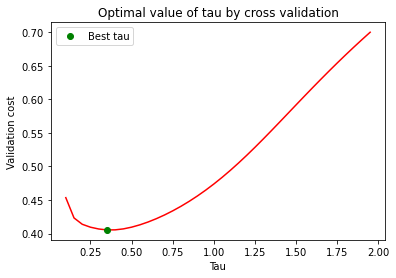

In [4]:
# Find best value of tau using cross validation

def lwlr_val_cost(X_train, y_train, X_val, y_val, tau):
    m_val = X_val.shape[0]
    cost = 0
    for i in range(m_val):
        yhat = lwlr_predict(X_train, y_train, X_val[i,1], tau)
        cost = cost + (yhat - y_val[i,0])**2
    cost = cost / m_val
    return cost

taus = np.arange(0.1, 2, 0.05)
val_costs = []
for tau in taus:
    val_costs.append(lwlr_val_cost(X_train, y_train, X_val, y_val, tau))

cost_best_index = np.argmin(val_costs)
tau_best = taus[cost_best_index]
cost_best = val_costs[cost_best_index]
print('Tau best:', tau_best)
plt.plot(taus, val_costs, 'r-')
plt.plot(tau_best, cost_best, 'go', label='Best tau')
plt.title('Optimal value of tau by cross validation')
plt.xlabel('Tau')
plt.ylabel('Validation cost')
plt.legend()
plt.show()


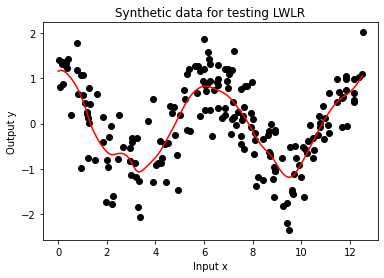

In [5]:
# Plot the prediction for different values of x along with the data

tau = tau_best
x_plot = np.arange(0, 4 * np.pi, 0.1)
y_plot = []
for x in x_plot:
    y_plot.append(lwlr_predict(X_train, y_train, x, tau))

plt.plot(X[:,1], y, 'ko')
plt.plot(x_plot, y_plot, 'r-', label='LWLR prediction')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data for testing LWLR')
plt.show()



#### Plot the prediction for different values of x along with the data

tau = tau_best
x_plot = np.arange(0, 4 * np.pi, 0.1)
y_plot = []
for x in x_plot:
    y_plot.append(lwlr_predict(X_train, y_train, x, tau))

plt.plot(X[:,1], y, 'ko')
plt.plot(x_plot, y_plot, 'r-', label='LWLR prediction')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data for testing LWLR')
plt.show()
